In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = '/content/drive/MyDrive/Colab Notebooks/output/train'
test = '/content/drive/MyDrive/Colab Notebooks/output/test'
val = '/content/drive/MyDrive/Colab Notebooks/output/val'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_shape = (224,224,3)
image_gen = ImageDataGenerator(rotation_range=20,
                               rescale=1/255,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )


In [4]:
image_gen.flow_from_directory(train)
image_gen.flow_from_directory(test)
image_gen.flow_from_directory(val)

Found 5152 images belonging to 8 classes.
Found 644 images belonging to 8 classes.
Found 644 images belonging to 8 classes.


In [5]:
train_image_gen = image_gen.flow_from_directory(train,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='categorical',shuffle=True)

val_image_gen = image_gen.flow_from_directory(val,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 5152 images belonging to 8 classes.
Found 644 images belonging to 8 classes.
Found 644 images belonging to 8 classes.


In [6]:
train_image_gen.class_indices

{'dyed-lifted-polyps': 0,
 'dyed-resection-margins': 1,
 'esophagitis': 2,
 'normal-cecum': 3,
 'normal-pylorus': 4,
 'normal-z-line': 5,
 'polyps': 6,
 'ulcerative-colitis': 7}

## INCEPTIONV3

In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

In [8]:
# Load the pre-trained InceptionV3 model without the top layer
base_modelv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))


87910968/87910968 [==============================] - 1s 0us/step


In [9]:
x = base_modelv3.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions1 = Dense(8, activation='softmax')(x)


In [10]:
modelv3 = Model(inputs=base_modelv3.input, outputs=predictions1)

In [11]:
for layer in base_modelv3.layers[:1]:
    layer.trainable = False


In [12]:
modelv3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
historyv3 = modelv3.fit(x=train_image_gen,
                      epochs=30,
                      validation_data=val_image_gen)


Epoch 1/30
161/161 [==============================] - 1343s 8s/step - loss: 0.8615 - accuracy: 0.7104 - val_loss: 0.4312 - val_accuracy: 0.8230
Epoch 2/30
161/161 [==============================] - 114s 708ms/step - loss: 0.2831 - accuracy: 0.8993 - val_loss: 0.2309 - val_accuracy: 0.9193
Epoch 3/30
161/161 [==============================] - 114s 708ms/step - loss: 0.1915 - accuracy: 0.9342 - val_loss: 0.2072 - val_accuracy: 0.9301
Epoch 4/30
161/161 [==============================] - 113s 704ms/step - loss: 0.1382 - accuracy: 0.9534 - val_loss: 0.1643 - val_accuracy: 0.9394
Epoch 5/30
161/161 [==============================] - 113s 704ms/step - loss: 0.1053 - accuracy: 0.9643 - val_loss: 0.1932 - val_accuracy: 0.9286
Epoch 6/30
161/161 [==============================] - 122s 756ms/step - loss: 0.0918 - accuracy: 0.9711 - val_loss: 0.1681 - val_accuracy: 0.9410
Epoch 7/30
161/161 [==============================] - 115s 713ms/step - loss: 0.0695 - accuracy: 0.9777 - val_loss: 0.1833 - v

In [14]:
test_historyv3 = modelv3.evaluate(x=test_image_gen)

21/21 [==============================] - 166s 8s/step - loss: 0.1402 - accuracy: 0.9752


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


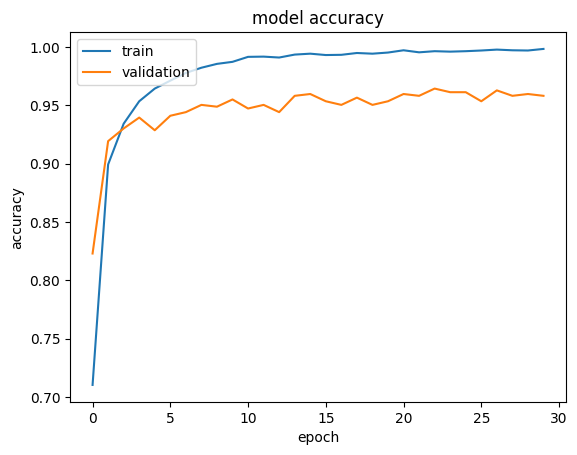

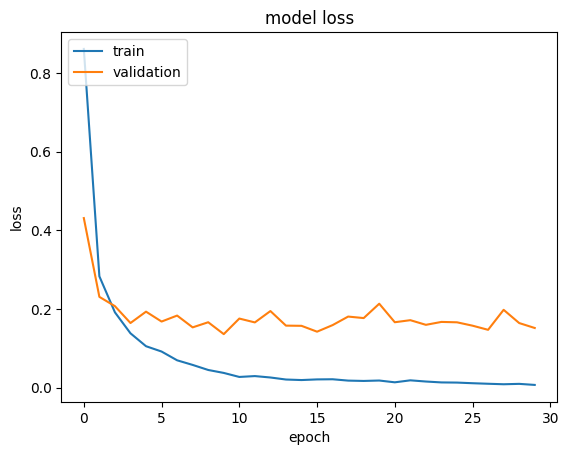

In [15]:
print(historyv3.history.keys())
#  "Accuracy"
plt.plot(historyv3.history['accuracy'])
plt.plot(historyv3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(historyv3.history['loss'])
plt.plot(historyv3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
modelv3.save('/content/drive/MyDrive/Colab Notebooks/Endo-inception97.h5')